##  <center> Comparing Effect of Topography </center> ##

In [6]:
# Load in Modules
import numpy as np
import numpy.ma as ma
from pylab import *
import matplotlib.pyplot as plt
import os
import sys
import cmocean
from matplotlib import gridspec
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from HB_Plot import nf, fmt
import useful
import SG
import layers_calc#_numba
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [33]:
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
tau = ['/3daynokpp/', '/Full/3/', '/Closeddaynokpp/', '/Full/Closed/']
Runs=np.array(tau)
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']

## Overturning ##

In [8]:
ls fname

ls: cannot access fname: No such file or directory


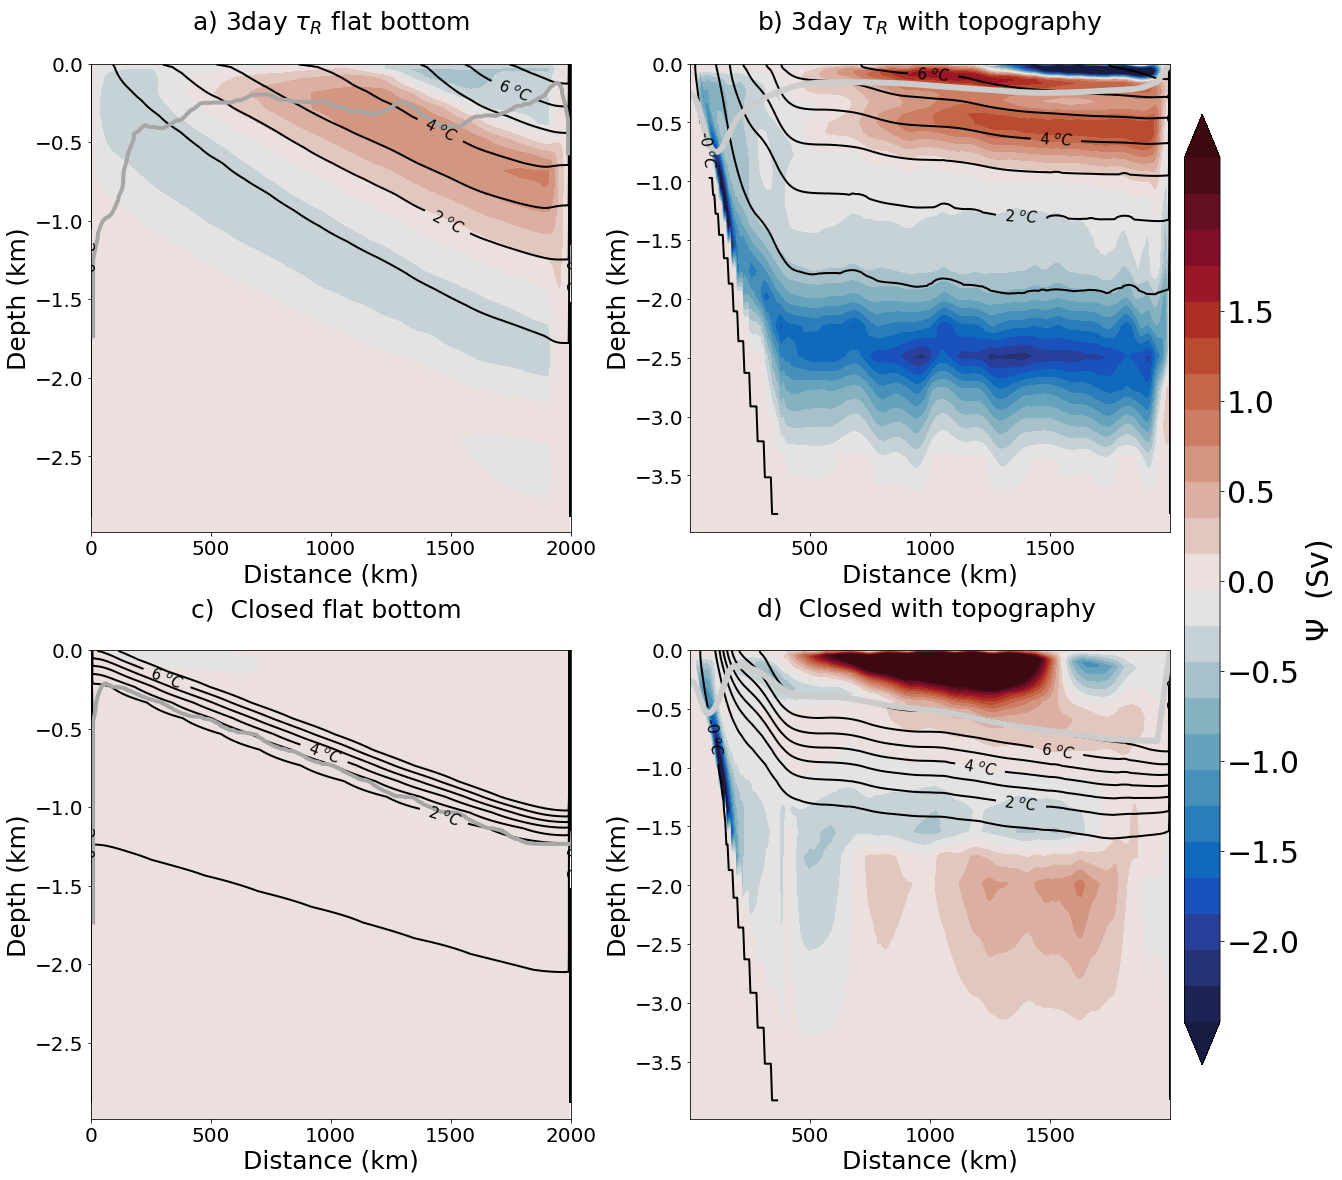

In [29]:
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-2.5, 2.5, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
for i in range(len(Runs)):
    #i =2 
    fname = x+str(Runs[i])
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS

    Psi = c.get_psi_iso_z()/10**6
    npad = ((0, 1), (0, 0))
    Psi = np.pad(Psi, pad_width=npad, mode='constant', constant_values=0)
    scale= 1


    ax = fig.add_subplot(2, 2, i+1)
    p = ax.contourf(c.yc/1000, c.zf/1000,
                Psi, Psi_levs*scale, cmap=cmocean.cm.balance, extend='both')
    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=15)
    mld = c.mnc('MLD.nc','MXLDEPTH')[0,:,:]
    # Plot mixed layer depth via layer probability
    g = layers_calc.LayersComputer(c)
    PI = c.mnc('PSI.nc', "LaPs1TH").mean(axis=2)
    th = c.mnc('PSI.nc', "LaHs1TH").mean(axis=2)
    PIz = g.transform_g_to_z(PI, th)
    # Remove some nonsense
    PIz[-5::, 50::] = np.nan
    # Plot very messy contour of lowest depth layer might not occur.
    # Check rough consistencey with MLD intitially then remove from code
    # mld = c.mnc('MLD.nc','MXLDEPTH')[0,:,:].mean(axis=1)
    #R = ax.plot(c.yc/1000, SG.savitzky_golay(-mld/1000, 21, 1), scalex=False,
    #            scaley=False, color='0.8', linestyle='-', linewidth=6)
    # Closed fixed Q run is a bit more variable with large top diabatic layer
    if i==0 or i==2:
        P = 0.9999999

        r = ax.contour(c.yg/1000, c.zc/1000, PIz, [P],
                   colors='0.75', linewidths=3)
        # Extract the contour data 
        dat0 = r.allsegs[0][0]
        # On inspection there are 2 contours picked up in closed scenario
        # Choose the sensible one!
        if i==2:
            dat0= r.allsegs[0][1]
   
        
        # Plot nice thick smoothed line!
        s = ax.plot(dat0[10:-10,0],SG.savitzky_golay(dat0[10:-10,1],27,1),color='0.65', linewidth=4)
        # Remove the messy countour
        ax.collections.pop(-1)
    if i==1 or i==3:    
        mld = c.mnc('MLD.nc','MXLDEPTH')[0,:,:].mean(axis=1)
        R = ax.plot(c.yc/1000, SG.savitzky_golay(-mld/1000, 21, 1), scalex=False,
                scaley=False, color='0.8', linestyle='-', linewidth=6)
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _{R} $ flat bottom' +'\n', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _R $ with topography' +' \n', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' Closed flat bottom ' +'\n', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed with topography ' +'\n', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel('Depth (km)', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

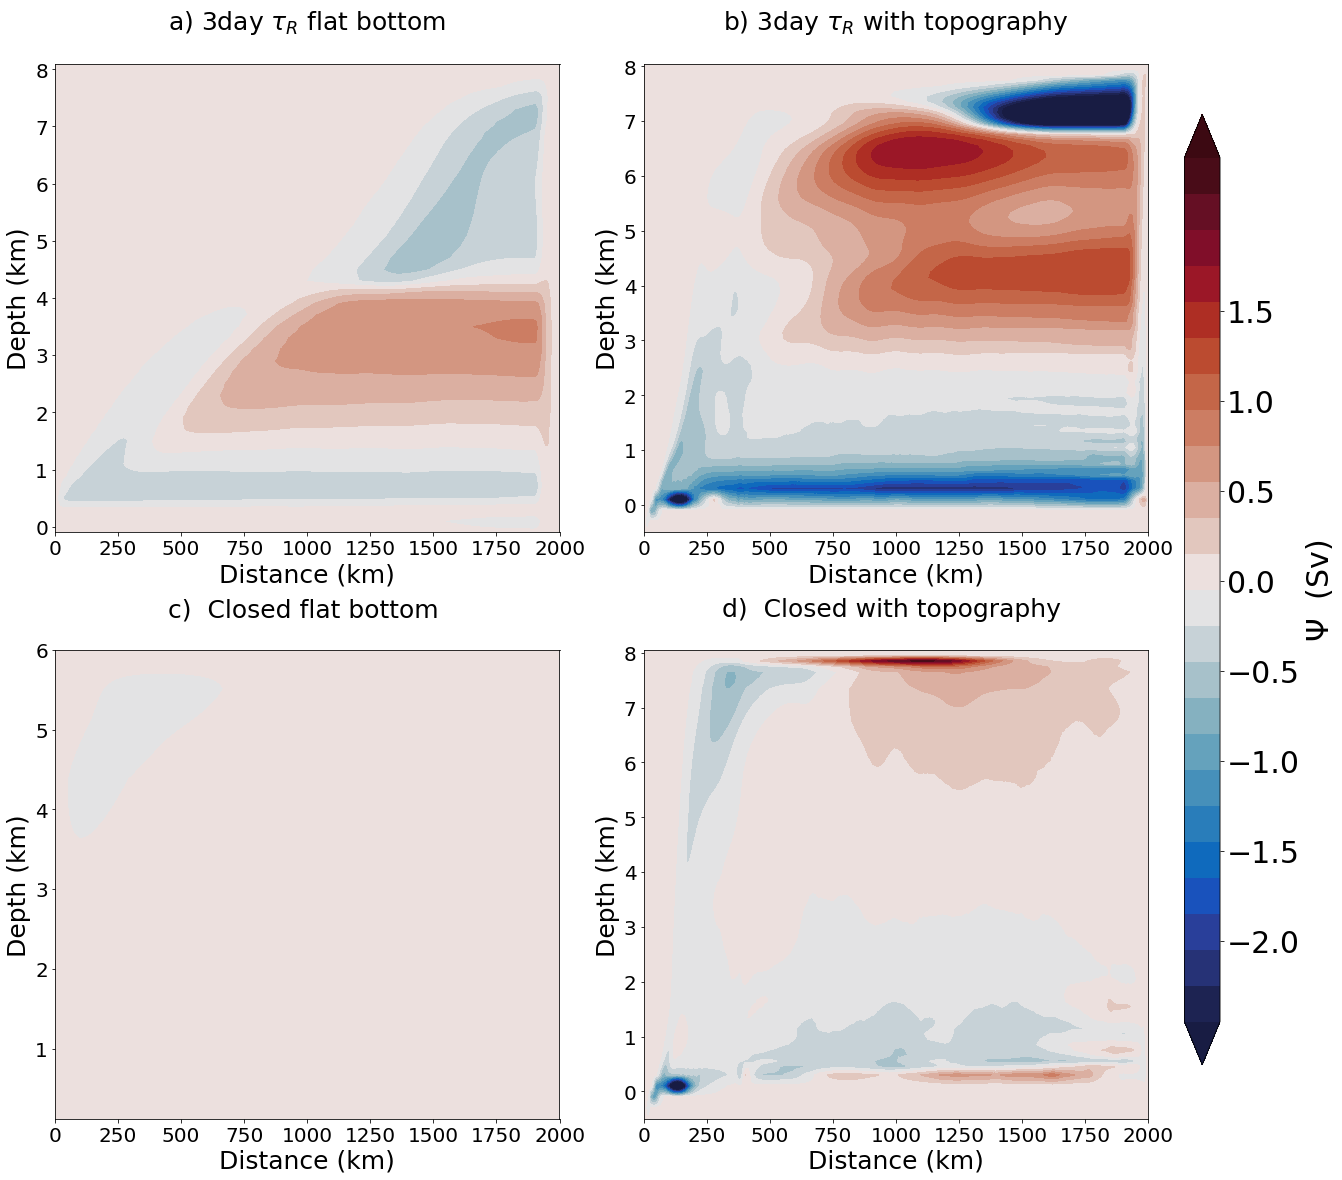

In [28]:
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-2.5, 2.5, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
for i in range(len(Runs)):
    #i =2 
    fname = x+str(Runs[i])
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    psi = c.get_psi_iso()/10**6
    y = c.yg/1000
    g = layers_calc.LayersComputer(c)
    rho = g.glvl
    if i==2:
        rho =rho*0.6
    psi[-2,:]=0
    ax = fig.add_subplot(2, 2, i+1)
    p = ax.contourf(y,rho[~isnan(rho)],psi,Psi_levs,cmap=cmocean.cm.balance,extend='both') 
    Psi = c.get_psi_iso_z()/10**6
    
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _{R} $ flat bottom' +'\n', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _R $ with topography' +' \n', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' Closed flat bottom ' +'\n', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed with topography ' +'\n', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel('Depth (km)', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

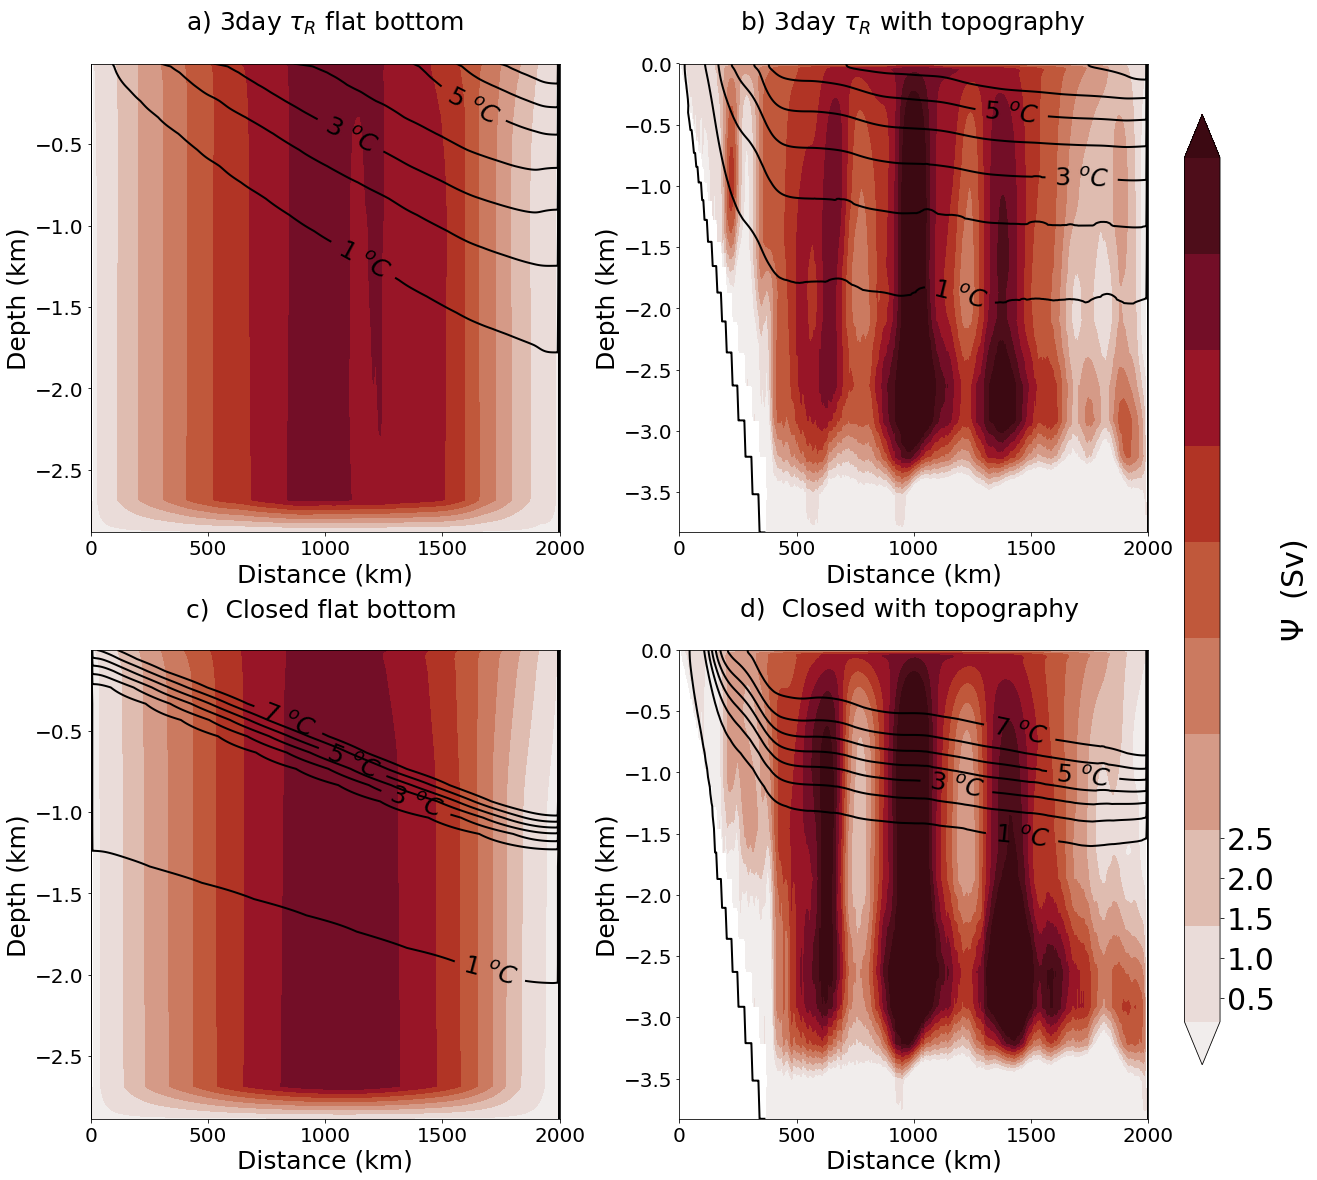

In [42]:
fig = plt.figure(figsize=(16.5, 16.5))

Psi_levs = np.arange(0.05, 2.8, .3)
Psi_ticks =np.arange(0, 3., .5)
Q_levs = np.arange(-0., 8., 1)
for i in range(len(Runs)):
    #i =2 
    fname = x+str(Runs[i])
    ax = fig.add_subplot(2, 2, i+1)
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    psi = c.get_psi_bar()/10**6
    psi[-1]=0
    Tavlat = c.mnc('Tav.nc','THETA',mask=c.HFacC).mean(axis=2)
    y = c.yc/1000
    yp = c.yg/1000
    if i==1 or i==3:
        scale=4
    else:
        scale=1
    p = ax.contourf(yp, c.zc/1000, psi, Psi_levs*scale,
                    cmap=cmocean.cm.amp,extend='both')
    Q2_levs = (np.arange(-1, 8, 1))
    Tavlat = c.get_zonal_avg('Tav.nc','THETA')
    q = ax.contour(y, c.zc/1000,
                   Tavlat, Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _{R} $ flat bottom' +'\n', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _R $ with topography' +' \n', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' Closed flat bottom ' +'\n', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed with topography ' +'\n', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel('Depth (km)', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$  (Sv)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

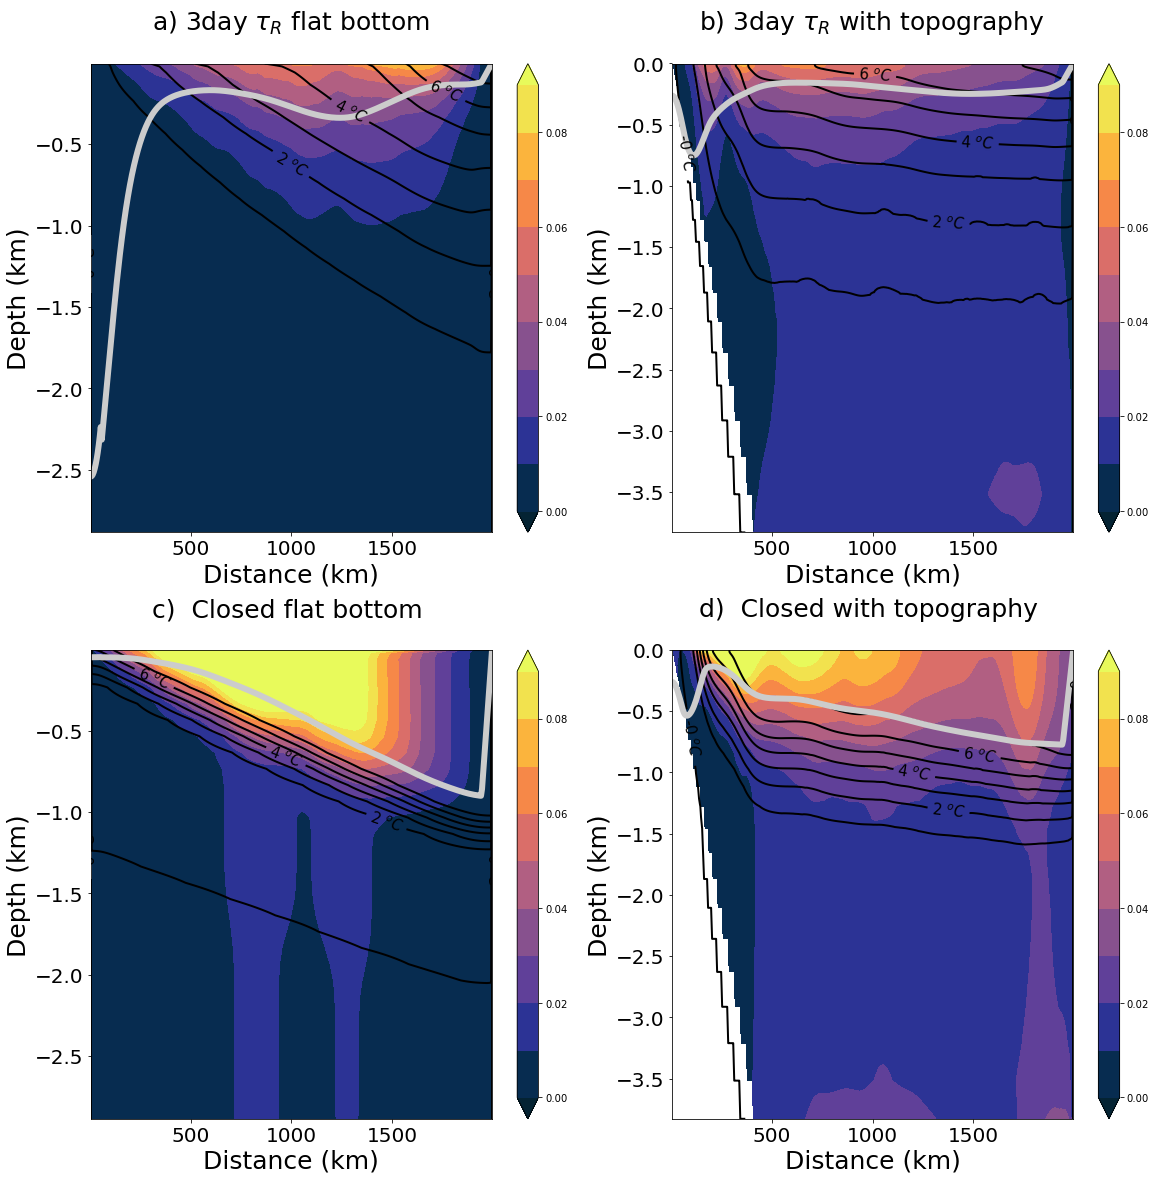

In [32]:
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-0., .10, .010)
Psi_ticks = np.arange(-0., .10, .02)
Q_levs = np.arange(-0., 8., 1)
for i in range(len(Runs)):
    #i =2 
    fname = x+str(Runs[i])
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS

    EKE = c.calc_EKE()
    npad = ((0, 1), (0, 0))
    Psi = np.pad(Psi, pad_width=npad, mode='constant', constant_values=0)

    if i==0 or i==2 : 
        scale = 1
    elif i==1 or i==3 :
        scale = 1

    ax = fig.add_subplot(2, 2, i+1)
    p = ax.contourf(c.yc/1000, c.zc/1000,
                EKE, Psi_levs*scale, cmap=cmocean.cm.thermal, extend='both')
    q = ax.contour(c.yc/1000, c.zc/1000, c.get_zonal_avg('Tav.nc','THETA'), Q_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=15)
    mld = c.mnc('MLD.nc','MXLDEPTH')[0,:,:]
    # Diabatic layer area
    PI = c.mnc('PSI.nc',"LaPs1TH").mean(axis=2)
    PI = ma.masked_array(PI,PI<0.95)
    th = c.mnc('PSI.nc',"LaHs1TH").mean(axis=2)
    depths = np.cumsum(th[::-1],axis=0)[::-1]
    
    # Find Max ROC and depth of diabatic layer
    mld = c.mnc('MLD.nc','MXLDEPTH')[0,:,:].mean(axis=1)
    DDL = np.zeros(len(c.yc))
    DDL_matrix = np.zeros_like(Psi)
    psi = c.get_psi_iso()
    for jj in range(len(c.yc)):
        if (ma.all(PI[:, jj] == 1) or np.all(psi[:, jj] == -0) or PI[:, jj].mask.all()):
            continue
        indx = ma.nonzero(PI[:, jj] < 1)[0]
        b = indx
        if len(b) >= 2 and (b[1]-b[0]) > 1:
            a = b[1]
        else:
            a = b[0]
        if a < 41 and depths[a-1, jj] - depths[a, jj] > 150:
            a = a - 1
        DDL[jj] = depths[a, jj]
    r = ax.plot(c.yc/1000, SG.savitzky_golay(-mld/1000, 21, 1), scalex=False,
                scaley=False, color='0.8', linestyle='-', linewidth=6)
    
    fig.colorbar(p, ax=ax,ticks=Psi_ticks*scale)
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _{R} $ flat bottom' +'\n', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _R $ with topography' +' \n', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' Closed flat bottom ' +'\n', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed with topography ' +'\n', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel('Depth (km)', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()


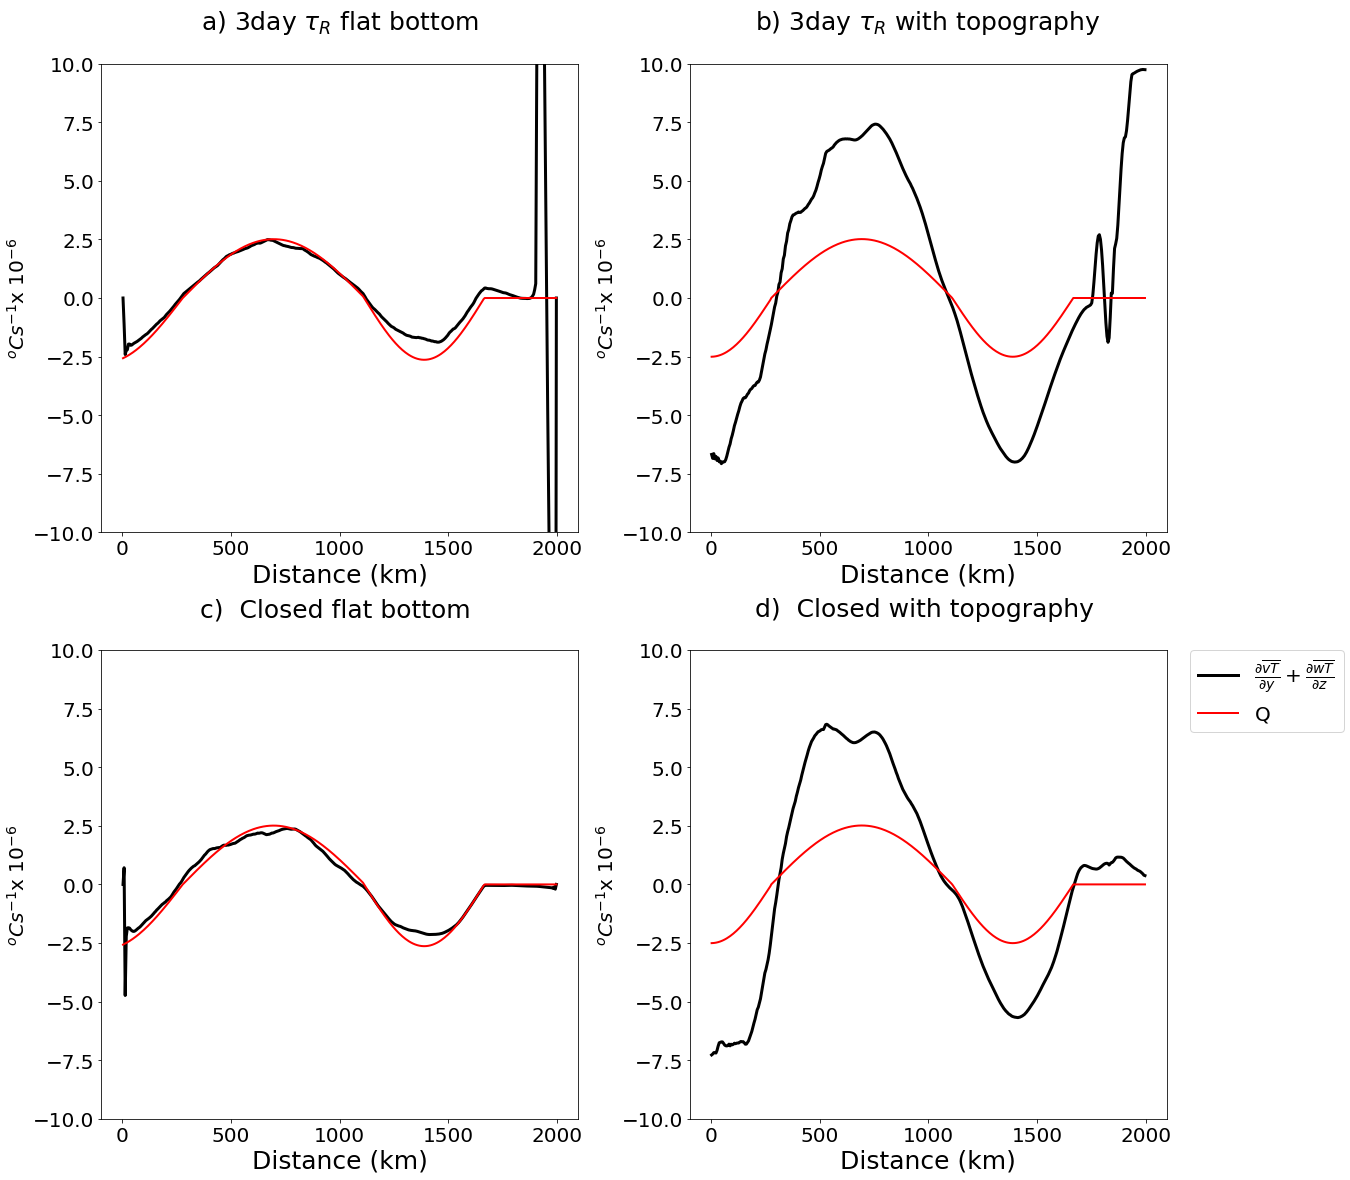

In [24]:
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-2.5, 2.5, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
for i in range(len(Runs)):
    #i =2 
    fname = x+str(Runs[i])
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNEL

    ax = fig.add_subplot(2, 2, i+1)
    CellVolv = 5000**2*np.tile(c.dzf,(c.Nx,c.Ny+1,1)).T*c.HFacS
    CellVolw = c.rac*np.tile(c.dzc,(c.Nx,c.Ny,1)).T
    CellVol = 5000**2*tile(c.dzf,(c.Nx,c.Ny,1)).T*c.HFacC
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar         
    # and volume weight it       
    VT = (c.mnc('Tav_VT.nc','VVELTH'))*CellVolv 
    WT = (c.mnc('Tav_VT.nc','WVELTH'))*c.HFacC
    # No slip bottom so W[-1]=0
    npad = ((0, 1), (0, 0), (0, 0))
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)*CellVolw
    # Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    WTHMASS = c.mnc('SURF.nc', 'WTHMASS')
    # Surface cor
    # Surf_corr_tend = (- WTHMASS(ix,iy)) / (DRF(1) * hFacC(ix,iy,1)
    Surcor = -(WTHMASS.mean(axis=0)).mean(axis=1)*c.dzf[0]
    dVT = (VT[:,0:-1,:]-VT[:,1::,:]) # volume weighted heat flux gradient
    dWT = (WT[1::,:,:]-WT[0:-1,:,:]) # volume weighted heat flux gradient
    
    Div = -(ma.sum(ma.sum(dVT + dWT,axis=2),axis=0))/sum(CellVol.mean(axis=2))
    # Surface Heat Flux in W/m**2
    if i==1 or i==3:
        Div = SG.savitzky_golay(Div,61,1)
    Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
    Psipred = (Q)/(1000*3985)
    p = plt.plot(c.yc/1000,(Div+Surcor)*10**6,'k',linewidth=3) # Divergence + free surface correction 
    p = plt.plot(c.yc/1000,(Psipred)*10**6,'r',linewidth=2)
    plt.ylim(-10,10)
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _{R} $ flat bottom' +'\n', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _R $ with topography' +' \n', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' Closed flat bottom ' +'\n', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed with topography ' +'\n', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
lgd=plt.legend([r'$\frac{\partial  \overline{vT}}{\partial y} + \frac{\partial  \overline{wT}}{\partial z}$',
                'Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)

/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in divide
/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in greater
/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in less
/noc/users/hb1g13/.conda/envs/CentOS/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in divide


KeyError: 'WVEL'

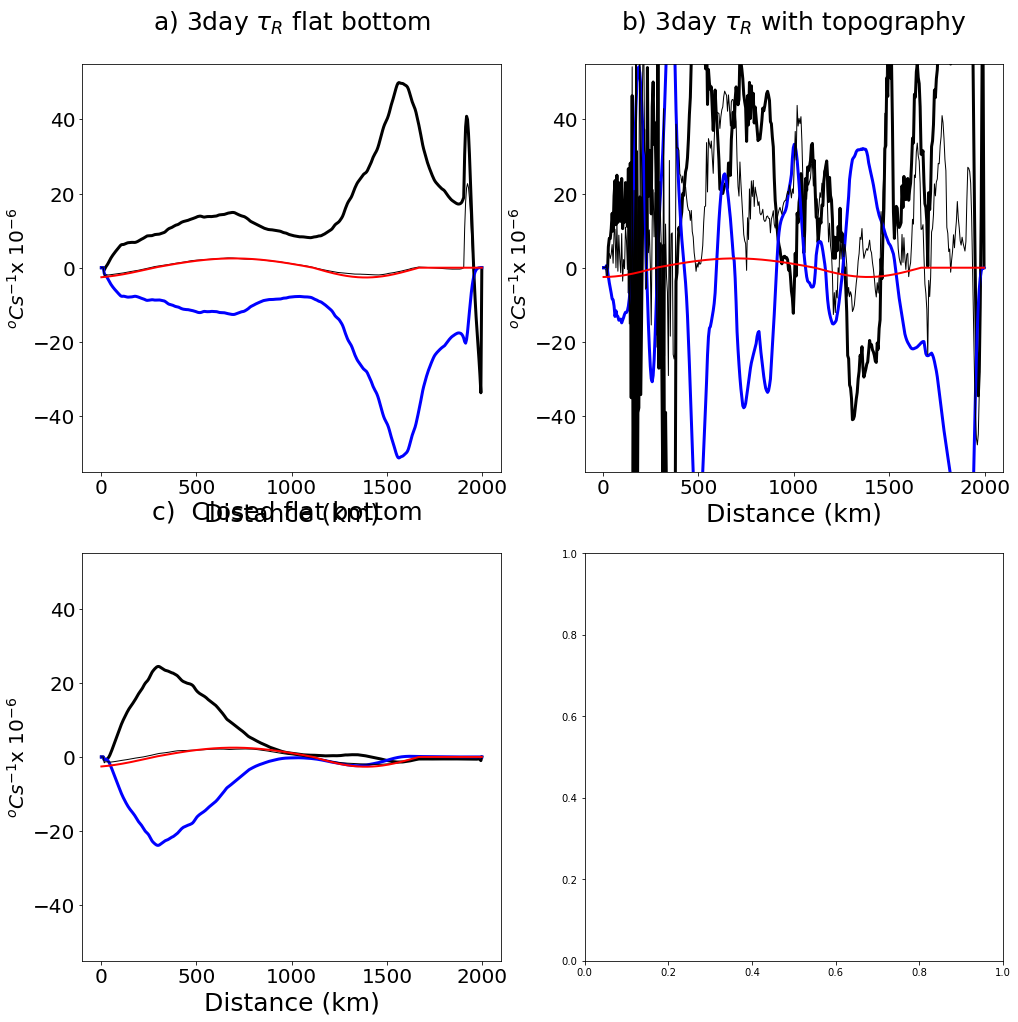

In [25]:
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-2.5, 2.5, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
plt.ion()
for i in range(len(Runs)):
    #i =2 
    fname = x+str(Runs[i])
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNEL

    ax = fig.add_subplot(2, 2, i+1)
    nopart = c. HFacC
    nopart[nopart<1] = 0
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T*nopart

    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((0, 1), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)
    VTbar = V*Tv
    WTbar = W*Tw
    VpTp = VT - VTbar
    WpTp = WT - WTbar
    # Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    WTHMASS = c.mnc('SURF.nc', 'WTHMASS')
    # Surface cor
    Surcor = (WTHMASS.mean(axis=0)).mean(axis=1)
    dVTbar = (VTbar[:,0:-1,:] - VTbar[:,1::,:])*CellVol
    dWTbar = (WTbar[1::,:,:] - WTbar[0:-1,:,:])*CellVol
    dVTe = (VpTp[:,0:-1,:] - VpTp[:,1::,:])*CellVol
    dWTe = (WpTp[1::,:,:] - WpTp[0:-1,:,:])*CellVol
    Ty = (Tv[:,0:-1,:] - Tv[:,1::,:])*CellVol
    Tz = (Tw[1::,:,:] - Tw[0:-1,:,:])*CellVol
    Sp = zeros((c.Nz,c.Ny,c.Nx))
    Sp = -Ty/Tz
    #Sp[abs(Sp)<10**-6]=10**-6
    Sp[Sp>1]=1
    Sp[Sp<-1]=-1
    Sp[isinf(Sp)]=10**-6
    Sp[isnan(Sp)]=10**-6
    Ade = ((c.vgrid_to_cgrid(VpTp)*Sp)[1::,:,:] 
           - (c.vgrid_to_cgrid(VpTp)*Sp)[0:-1,:,:])*CellVol[0:-1,:,:] 
    DE = ((c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[1::,:,:] 
          - (c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[0:-1,:,:])*CellVol[0:-1,:,:] 
    # Surface cor
    # Surf_corr_tend = (- WTHMASS(ix,iy)) / (DRF(1) * hFacC(ix,iy,1)
    Surcor = -(WTHMASS.mean(axis=0)).mean(axis=1)*c.dzf[0]
    npad = ((0, 1), (0, 0), (0, 0))
    DE = np.pad(DE, pad_width=npad, mode='constant', constant_values=0)

    ROC = -((np.nansum(Ade,axis=0) + dVTe.sum(axis=0) + dVTbar.sum(axis=0) + dWTbar.sum(axis=0)).sum(axis=1))/sum(CellVol.mean(axis=2))
 
    D = -((((DE )).sum(axis=2)).sum(axis=0))/sum(CellVol.mean(axis=2))
    # Tidy for boundary conditions
    ROC[0:3] = 0
    D[0:3] = 0

    if i==2:
        ROC = ROC*0.8
        D = D*0.8
    # Surface Heat Flux in W/m**2
    Q = c.mnc('SURF.nc', 'TFLUX').mean(axis=0).mean(axis=1)

    Psipred = -(Q)/(1000*3985)
    p = plt.plot(c.yc/1000,(ROC)*10**6,'k',linewidth=3)
    p = plt.plot(c.yc/1000,(D)*10**6,'b',linewidth=3)
    p = plt.plot(c.yc/1000,(ROC+D+Surcor)*10**6,'k',linewidth=1)
    p = plt.plot(c.yc/1000,(-Psipred)*10**6,'r',linewidth=2)
    plt.ylim(-55,55)
    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _{R} $ flat bottom' +'\n', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _R $ with topography' +' \n', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' Closed flat bottom ' +'\n', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed with topography ' +'\n', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
lgd=plt.legend([r'$\frac{\partial  \overline{vT}}{\partial y} + \frac{\partial  \overline{wT}}{\partial z}$',
                'Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)

In [ ]:
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-2.5, 2.5, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
for i in range(len(Runs)):
    #i =2 
    fname = x+str(Runs[i])
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNEL
    nopart = c. HFacC
    nopart[nopart<1] = 0
    ax = fig.add_subplot(2, 2, i+1)
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T*nopart
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    T = c.mnc('Tav.nc','THETA')
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((0, 1), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)
    VTbar = V*Tv
    WTbar = W*Tw
    VpTp = VT - VTbar
    WpTp = WT - WTbar
    # Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    WTHMASS = c.mnc('SURF.nc', 'WTHMASS')
    # Surface cor
    Surcor = (WTHMASS.mean(axis=0)).mean(axis=1)
    dVTbar = (VTbar[:,0:-1,:] - VTbar[:,1::,:])*CellVol
    dWTbar = (WTbar[1::,:,:] - WTbar[0:-1,:,:])*CellVol
    dVTe = (VpTp[:,0:-1,:] - VpTp[:,1::,:])*CellVol
    dWTe = (WpTp[1::,:,:] - WpTp[0:-1,:,:])*CellVol
    Ty = (Tv[:,0:-1,:] - Tv[:,1::,:])*CellVol
    Tz = (Tw[1::,:,:] - Tw[0:-1,:,:])*CellVol
    Sp = zeros((c.Nz,c.Ny,c.Nx))
    Sp = -Ty/Tz
    #Sp[abs(Sp)<10**-5]=10**-5
    Sp[isinf(Sp)]=10**-5
    Sp[isnan(Sp)]=10**-5

    p = ax.contourf(c.yc/1000, c.zc[0:5]/1000,
              (Sp*nopart)[0:5,:,180],np.arange(-1,1,0.1), cmap=cmocean.cm.balance, extend='both')
  


    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _{R} $ flat bottom' +'\n', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _R $ with topography' +' \n', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' Closed flat bottom ' +'\n', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed with topography ' +'\n', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)

cbar.ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

In [ ]:
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-2.5, 2.5, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
for i in range(len(Runs)):
    #i =2 
    fname = x+str(Runs[i])
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNEL
    nopart = c. HFacC
    nopart[nopart<1] = 0
    ax = fig.add_subplot(2, 2, i+1)
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T*nopart
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH',mask=c.HFacS))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((0, 1), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)
    VTbar = V*Tv
    WTbar = W*Tw
    VpTp = VT - VTbar
    WpTp = WT - WTbar
    # Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    WTHMASS = c.mnc('SURF.nc', 'WTHMASS')
    # Surface cor
    Surcor = (WTHMASS.mean(axis=0)).mean(axis=1)
    dVTbar = (VTbar[:,0:-1,:] - VTbar[:,1::,:])*CellVol
    dWTbar = (WTbar[1::,:,:] - WTbar[0:-1,:,:])*CellVol
    dVTe = (VpTp[:,0:-1,:] - VpTp[:,1::,:])*CellVol
    dWTe = (WpTp[1::,:,:] - WpTp[0:-1,:,:])*CellVol
    Ty = (Tv[:,0:-1,:] - Tv[:,1::,:])*CellVol
    Tz = (Tw[1::,:,:] - Tw[0:-1,:,:])*CellVol
    Sp = zeros((c.Nz,c.Ny,c.Nx))
    Sp = -Ty/Tz
    Sp[abs(Sp)<10**-5]=10**-5
    Sp[isinf(Sp)]=10**-5
    Sp[isnan(Sp)]=10**-5
    Ade = ((c.vgrid_to_cgrid(VpTp)*Sp)[1::,:,:] 
           - (c.vgrid_to_cgrid(VpTp)*Sp)[0:-1,:,:])*CellVol[0:-1,:,:] 
    DE = ((c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[1::,:,:] 
          - (c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[0:-1,:,:])*CellVol[0:-1,:,:] 
    # Surface cor
    # Surf_corr_tend = (- WTHMASS(ix,iy)) / (DRF(1) * hFacC(ix,iy,1)
    Surcor = -(WTHMASS.mean(axis=0)).mean(axis=1)*c.dzf[0]
    npad = ((0, 1), (0, 0), (0, 0))
    DE = np.pad(DE, pad_width=npad, mode='constant', constant_values=0)

 
    ROC = -((np.nansum(Ade,axis=0) + dVTe.sum(axis=0) + dVTbar.sum(axis=0) + dWTbar.sum(axis=0)).sum(axis=1))/sum(CellVol.mean(axis=2))
    D = -(((DE )).sum(axis=2))/np.sum(CellVol.mean(axis=2) )
    # Tidy for boundary conditions
    ROC[0:3] = 0
    D[0:3] = 0
    if i==(len(Runs)):
        ROC = ROC*0.8
        D = D*0.8
    # Surface Heat Flux in W/m**2
    Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
    Psipred = -(Q)/(1000*3985)
    p = ax.contourf(c.yc/1000, c.zc/1000,
                D*10**6, np.arange(-1,1,0.15)*20, cmap=cmocean.cm.balance, extend='both')
  


    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _{R} $ flat bottom' +'\n', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _R $ with topography' +' \n', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' Closed flat bottom ' +'\n', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed with topography ' +'\n', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax,ticks=np.arange(-1,1,0.2)*20)

cbar.ax.set_ylabel(r'$^oCs^{-1}$x $10^{-6}$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

In [ ]:
fig = plt.figure(figsize=(16.5, 16.5))
Psi_levs = np.arange(-2.5, 2.5, .2)+0.05
Psi_ticks =np.arange(-2., 2., .5)
Q_levs = np.arange(-0., 8., 1)
plt.ion()
for i in range(len(Runs)):
    #i =2 
    fname = x+str(Runs[i])
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNEL
    nopart = c. HFacC
    nopart[nopart<1] = 0
    ax = fig.add_subplot(2, 2, i+1)
    CellVol = c.rac*tile(c.dzf,(c.Nx,c.Ny,1)).T*nopart
    Nx,Ny,Nz = c.Nx, c.Ny, c.Nz
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((0, 1), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)
    VTbar = V*Tv
    WTbar = W*Tw
    VpTp = VT - VTbar
    WpTp = WT - WTbar
    # Vertical Mass-Weight Transp of Pot Temp (K.m/s)
    WTHMASS = c.mnc('SURF.nc', 'WTHMASS')
    # Surface cor
    Surcor = (WTHMASS.mean(axis=0)).mean(axis=1)
    dVTbar = (VTbar[:,0:-1,:] - VTbar[:,1::,:])*CellVol
    dWTbar = (WTbar[1::,:,:] - WTbar[0:-1,:,:])*CellVol
    dVTe = (VpTp[:,0:-1,:] - VpTp[:,1::,:])*CellVol
    dWTe = (WpTp[1::,:,:] - WpTp[0:-1,:,:])*CellVol
    Ty = (Tv[:,0:-1,:] - Tv[:,1::,:])*CellVol
    Tz = (Tw[1::,:,:] - Tw[0:-1,:,:])*CellVol
    Sp = zeros((c.Nz,c.Ny,c.Nx))
    Sp = -Ty/Tz
    Sp[abs(Sp)<10**-5]=10**-5
    Sp[isinf(Sp)]=10**-5
    Sp[isnan(Sp)]=10**-5
    Ade = ((c.vgrid_to_cgrid(VpTp)*Sp)[1::,:,:] 
           - (c.vgrid_to_cgrid(VpTp)*Sp)[0:-1,:,:])*CellVol[0:-1,:,:] 
    DE = ((c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[1::,:,:] 
          - (c.wgrid_to_cgrid(WpTp)-(c.vgrid_to_cgrid(VpTp)*Sp))[0:-1,:,:])*CellVol[0:-1,:,:] 
    # Surface cor
    # Surf_corr_tend = (- WTHMASS(ix,iy)) / (DRF(1) * hFacC(ix,iy,1)
    Surcor = -(WTHMASS.mean(axis=0)).mean(axis=1)*c.dzf[0]
    npad = ((0, 1), (0, 0), (0, 0))
    DE = np.pad(DE, pad_width=npad, mode='constant', constant_values=0)

 
    ROC = -((np.nansum(Ade,axis=0) + dVTe.sum(axis=0) + dVTbar.sum(axis=0) + dWTbar.sum(axis=0)).sum(axis=1))/sum(CellVol.mean(axis=2))
    D = -(((DE)))/np.sum(CellVol)
    # Tidy for boundary conditions
    ROC[0:3] = 0
    D[0:3] = 0
    if i==(len(Runs)):
        ROC = ROC*0.8
        D = D*0.8
    # Surface Heat Flux in W/m**2
    Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
    if i==0 or i==2 : 
        scale = 2
    elif i==1 or i==3 :
        scale = 2 #.75
    Psipred = -(Q)/(1000*3985)
    p = ax.contourf(c.yc/1000, c.zc/1000,
                D[:,:,100]*10**11, scale*np.arange(-1,1,0.15)*20, cmap=cmocean.cm.balance, extend='both')
  
    fig.colorbar(p, ax=ax,ticks=np.arange(-1,1,0.2)*20*scale)

    if str(Figletter[i])=='a) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _{R} $ flat bottom' +'\n', fontsize=25)
    elif str(Figletter[i])=='b) ':
        ax.set_title(str(Figletter[i])+r'3day $ \tau _R $ with topography' +' \n', fontsize=25)
    elif str(Figletter[i])=='c) ':
        ax.set_title(str(Figletter[i])+r' Closed flat bottom ' +'\n', fontsize=25)
    elif str(Figletter[i])=='d) ':
        ax.set_title(str(Figletter[i])+r' Closed with topography ' +'\n', fontsize=25)
        

    ax.set_xlabel('Distance (km)', fontsize=25)
    ax.set_ylabel(r'$^oCs^{-1}$x $10^{-11}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
